In [1]:
#install package
!pip install Sastrawi
import nltk
nltk.download('stopwords')

     |████████████████████████████████| 209 kB 8.3 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [1]:
#import data and preprocessing
import pandas as pd
import matplotlib.pyplot as plt  
import random
import re
import string
import numpy as np
from string import punctuation
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory=StemmerFactory()
stemmer=factory.create_stemmer()

#modelling
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#evaluation metric
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
#read data
sentiment_df = pd.read_csv('https://raw.githubusercontent.com/hendrip8/Data-Fellowship-IYKRA/main/data_gabung.csv')
sentiment_df.head(2)

,Unnamed: 0,id,url,title,content,Label
0,0,0,https://www.tribunnews.com/bisnis/2020/10/06/s...,\n\t\t\t\t\t\tSektor Pertanian Tumbuh Signifik...,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",Bisnis
1,1,1,https://www.tribunnews.com/bisnis/2020/10/06/t...,\n\t\t\t\t\t\tTekan Jokowi Soal UU Cipta Kerja...,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",Bisnis


In [3]:
#remove b' on label column
sentiment_df['content'] = [re.sub(r"b\S+","",stc) for stc in sentiment_df['content']]
sentiment_df.head(2)

,Unnamed: 0,id,url,title,content,Label
0,0,0,https://www.tribunnews.com/bisnis/2020/10/06/s...,\n\t\t\t\t\t\tSektor Pertanian Tumbuh Signifik...,JAKARTA -- Pemerintah optimistis sektor perta...,Bisnis
1,1,1,https://www.tribunnews.com/bisnis/2020/10/06/t...,\n\t\t\t\t\t\tTekan Jokowi Soal UU Cipta Kerja...,Wartawan Tri Yanuar Riezqi Yovanda TRIBUNNEWS...,Bisnis


In [6]:
#check the number of class in each label category
sentiment_df.groupby('Label').count()

,Unnamed: 0,id,url,title,content
Label,,,,,
Bisnis,40,40,40,40,40
Lifestyle,40,40,40,40,40
Sport,40,40,40,40,40


In [7]:
#drop unused column
sentiment_df.drop(['Unnamed: 0','id','url','title'], axis=1, inplace=True)

# **Without Preprocessing**

**Bag of Words**

In [6]:
#create count vectorizer
cv = CountVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

In [7]:
#split train and test data
random.seed(10)
np.random.seed(10) 
X_train, X_test, y_train, y_test = train_test_split(sentiment_df['content'], sentiment_df['Label'], test_size=0.2)

In [8]:
#transform predictor into count vectorizer
X_train_vect=cv.fit_transform(X_train)
X_train_vect.toarray()
X_test_vect=cv.transform(X_test)

C:\Users\Windows\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [9]:
#mapping response into numeric
y_train=y_train.map({'Bisnis':1, 'Lifestyle':2, 'Sport':3})
y_test=y_test.map({'Bisnis':1, 'Lifestyle':2, 'Sport':3})

In [10]:
#view predictor
cv_df=pd.DataFrame(X_train_vect.toarray(), columns=cv.get_feature_names())
cv_df

,a,acara,aceh,aco,adat,adb,adelle,adellejewellery,adie,adies,...,yuan,yuk,zainudin,zakat,zaman,zen,zodiak,zodiakmu,zona,zoom
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


In [15]:
#modelling with svm kernel linear
np.random.seed(10) 
random.seed(10)
SVM1 = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM1.fit(X_train_vect, y_train)

SVC(gamma='auto', kernel='linear')

In [14]:
#accuracy on testing data
predicted1 = SVM1.predict(X_test_vect)
accuracy_score(y_test, predicted1)

0.9166666666666666

In [15]:
#accuracy on training data
accuracy_score(y_train, SVM1.predict(X_train_vect))

1.0

In [16]:
#classification report
print(classification_report(y_test, predicted1))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.83      1.00      0.91        10
           3       1.00      0.86      0.92         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.92        24
weighted avg       0.93      0.92      0.92        24



In [17]:
#confusion matrix
print(confusion_matrix(y_test, predicted1))

[[ 6  1  0]
 [ 0 10  0]
 [ 0  1  6]]


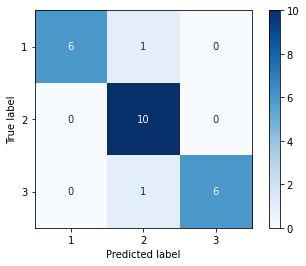

In [18]:
#plot confusion matrix
plot_confusion_matrix(SVM1,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [19]:
#modelling with multinomial logistic regression
np.random.seed(10)
random.seed(10)
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train_vect, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#accuracy on testing data
predictedlr = lr.predict(X_test_vect)
accuracy_score(y_test, predictedlr)

NameError: name 'lr' is not defined

In [21]:
#accuracy on training data
accuracy_score(y_train, lr.predict(X_train_vect))

1.0

In [22]:
#classification report
print(classification_report(y_test, predictedlr))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92         7
           2       0.83      1.00      0.91        10
           3       1.00      0.86      0.92         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.92        24
weighted avg       0.93      0.92      0.92        24



In [29]:
#confusion matrix
print(confusion_matrix(y_test, predictedlr))

[[ 6  1  0]
 [ 0 10  0]
 [ 0  1  6]]


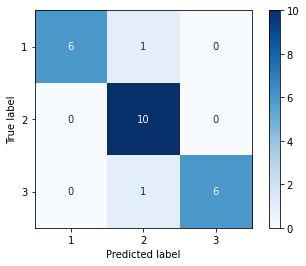

In [30]:
#plot confusion matrix
plot_confusion_matrix(lr,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [31]:
#modelling with naive bayes
np.random.seed(10)
random.seed(10)
nb = naive_bayes.MultinomialNB()
nb.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
#accuracy on testing data
predictednb = nb.predict(X_test_vect)
accuracy_score(y_test, predictednb)

1.0

In [33]:
#accuracy on training data
accuracy_score(y_train, nb.predict(X_train_vect))

1.0

In [35]:
#classification report
print(classification_report(y_test, predictednb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [36]:
#confusion matrix
print(confusion_matrix(y_test, predictednb))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


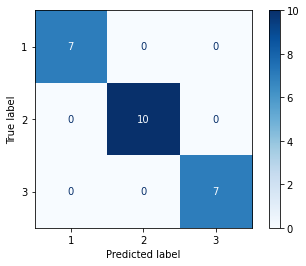

In [37]:
#plot confusion matrix
plot_confusion_matrix(nb,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [38]:
#modelling with random forest
np.random.seed(10)
random.seed(10)
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
#accuracy on testing data
predictedrf = rf.predict(X_test_vect)
accuracy_score(y_test, predictedrf)

0.9583333333333334

In [40]:
#accuracy on training data
accuracy_score(y_train, rf.predict(X_train_vect))

1.0

In [41]:
#classification report
print(classification_report(y_test, predictedrf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [42]:
#confusion matrix
print(confusion_matrix(y_test, predictedrf))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


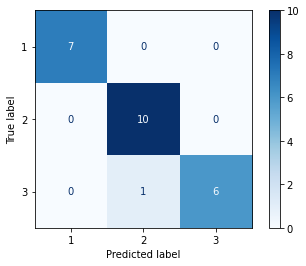

In [43]:
#plot confusion matrix
plot_confusion_matrix(rf,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

**TF-IDF**

In [44]:
#create TF-IDF vectorizer
tf = TfidfVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

In [45]:
#transform predictor into count vectorizer
X_train_vect1=tf.fit_transform(X_train)
X_train_vect1.toarray()
X_test_vect1=tf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [46]:
#view predictor
tf_df=pd.DataFrame(X_train_vect1.toarray(), columns=tf.get_feature_names())
tf_df

,a,acara,aceh,aco,adat,adb,adelle,adellejewellery,adie,adies,adik,adjusment,administrasi,adult,adupi,agama,agen,agenda,agraria,agustus,ahli,ahy,ai,air,airlangga,ajang,aki,akrab,akses,aksesoris,aksi,aktivis,akui,akun,akurasi,al,alam,alamasri,alamat,alami,...,wireless,wisata,wiyanto,wna,wni,won,work,world,wsidodo,wujud,www,x,xa,xc,xe,xi,ya,yahng,yamaha,yan,yanuar,yard,yas,yasonna,yen,yoghurt,yogjakarta,young,youtu,yovanda,yuan,yuk,zainudin,zakat,zaman,zen,zodiak,zodiakmu,zona,zoom
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.047054,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.051316,0.0,0.0,0.0,0.0,0.000000,0.046410,0.020932,0.020932,0.023205,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.051316,0.0,0.0,0.0,0.000000,0.000000,0.051316,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.065714,0.0,0.0,0.000000,0.0,0.0,0.055538,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.106549,0.000000,0.029233,0.029233,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172373,0.0,0.0,0.0,0.0,0.000000,0.280036,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.079028,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035156,0.035156,0.000000,0.0,0.0,0.0,0.000000,0.0,0.064068,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.079028,0.064068,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.063635,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.337440,0.337440,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.023942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.079265,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.042355,0.071592,0.000000,0.0,0.0,0.0,0.0,0.000000,0.459525,0.056525,0.056525,0.229763,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.15853,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.033074,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.071336,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.071336,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
92,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.075489,0.136188,0.136188,0.037744,0.0,0

In [47]:
#modelling with svm kernel linear
np.random.seed(10)
random.seed(10)
SVM11 = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM11.fit(X_train_vect1, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
#accuracy on testing data
predicted11 = SVM11.predict(X_test_vect1)
accuracy_score(y_test, predicted11)

1.0

In [49]:
#accuracy on training data
accuracy_score(y_train, SVM11.predict(X_train_vect))

1.0

In [50]:
#classification report
print(classification_report(y_test, predicted11))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [51]:
#confusion matrix
print(classification_report(y_test, predicted11))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



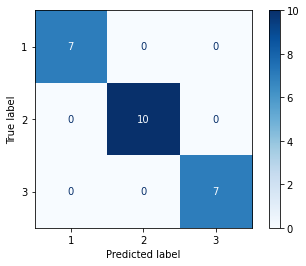

In [52]:
#plot confusion matrix
plot_confusion_matrix(SVM11,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [53]:
#modelling with multinomial logistic regression
np.random.seed(10)
random.seed(10)
lr1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr1.fit(X_train_vect1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
#accuracy on testing data
predictedlr1 = lr1.predict(X_test_vect1)
accuracy_score(y_test, predictedlr1)

0.9583333333333334

In [55]:
#accuracy on training data
accuracy_score(y_train, lr1.predict(X_train_vect))

0.9895833333333334

In [56]:
#classification report
print(classification_report(y_test, predictedlr1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [57]:
#confusion matrix
print(confusion_matrix(y_test, predictedlr1))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


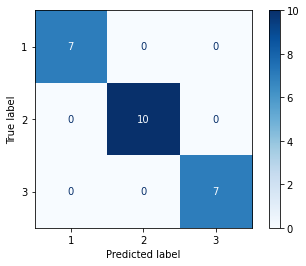

In [58]:
#plot confusion matrix
plot_confusion_matrix(lr1,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()    

In [151]:
#modelling with naive bayes
np.random.seed(10)
random.seed(10)
nb1 = naive_bayes.MultinomialNB()
nb1.fit(X_train_vect1, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [152]:
#accuracy on testing data
predictednb1 = nb1.predict(X_test_vect1)
accuracy_score(y_test, predictednb1)

1.0

In [153]:
#accuracy on training data
accuracy_score(y_train, nb1.predict(X_train_vect))

0.9895833333333334

In [61]:
#classification report
print(classification_report(y_test, predictednb1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [62]:
#confusion matrix
print(confusion_matrix(y_test, predictednb1))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


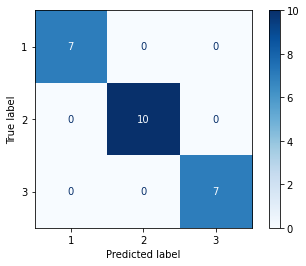

In [63]:
#plot confusion matrix
plot_confusion_matrix(nb1,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

In [64]:
#modelling with random forest
np.random.seed(10)
random.seed(10)
rf1 = RandomForestClassifier(random_state=0)
rf1.fit(X_train_vect1, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
#accuracy on testing data
predictedrf1 = rf1.predict(X_test_vect1)
accuracy_score(y_test, predictedrf1)

0.9583333333333334

In [66]:
#accuracy on training data
accuracy_score(y_train, rf1.predict(X_train_vect))

1.0

In [67]:
#classification report
print(classification_report(y_test, predictedrf1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [68]:
#confusion matrix
print(confusion_matrix(y_test, predictedrf1))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


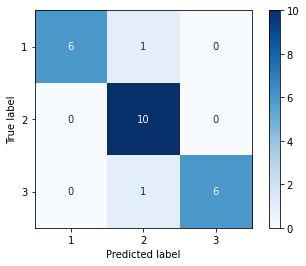

In [69]:
#plot confusion matrix
plot_confusion_matrix(rf1,X_test_vect, y_test,cmap=plt.cm.Blues)  
plt.show()  

# **With Preprocessing**

In [70]:
#preprocessing function
def preprocessing(sentence):
    #lowercasing
    sentence = sentence.lower()
    #remove white spaces
    sentence = sentence.strip()
    #tokenization
    words = sentence.split()
    #remove punctuation/ special character
    remove_table = str.maketrans("", "", punctuation)
    words = [x.translate(remove_table) for x in words]
    #remove nonalphanumeric <=3 chars
    words = [x for x in words if x.isalnum() and len(x) > 3]
    #stemming
    words = [stemmer.stem(w) for w in words]
    #remove stopwords
    words = [x for x in words if x not in stop_words ]
    #rejoining the words
    sentence = " ".join(words)
    return sentence

In [81]:
#preprocessing on data
sentiment_df2 = sentiment_df.copy()
sentiment_df2['content'] = [preprocessing(stc) for stc in sentiment_df2['content']]
sentiment_df2['content'].head(2)

0    jakarta perintah optimistis sektor tani sangga...
1    wartawan yanuar riezqi yovanda tribunnewscom j...
Name: content, dtype: object

In [83]:
#check number of word before and after preprocessing
from nltk.tokenize import word_tokenize
import itertools

import nltk
nltk.download('punkt')

before = [word_tokenize(text) for text in sentiment_df['content']]
iter_before = list(itertools.chain(*before))
after = [word_tokenize(text) for text in sentiment_df2['content']]
iter_after = list(itertools.chain(*after))
print('before pre-processing   :', len(iter_before))
print('after pre-processing    :', len(iter_after))
print('delete                  :', (len(iter_before))-(len(iter_after)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
before pre-processing   : 24416
after pre-processing    : 11555
delete                  : 12861


In [84]:
#split train and test data
np.random.seed(10)
random.seed(10)
X_train2, X_test2, y_train2, y_test2 = train_test_split(sentiment_df2['content'], sentiment_df2['Label'], test_size=0.2)

**Bag of Words**

In [85]:
#create count vectorizer
cv1 = CountVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

In [86]:
#transform predictor into count vectorizer
X_train_vect2=cv1.fit_transform(X_train2)
X_train_vect2.toarray()
X_test_vect2=cv1.transform(X_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [87]:
#mapping response into numeric
y_train2=y_train2.map({'Bisnis':1, 'Lifestyle':2, 'Sport':3})
y_test2=y_test2.map({'Bisnis':1, 'Lifestyle':2, 'Sport':3})

In [88]:
#view predictor
cv_df2=pd.DataFrame(X_train_vect2.toarray(), columns=cv1.get_feature_names())
cv_df2

,acara,aceh,acu,adat,adaxc,adelle,adellejewellery,adellexe,adie,adies,adik,adjusmentxe,administrasi,adupi,agama,agen,agenagen,agenda,agraria,agustus,ahli,airlangga,airxe,ajang,ajar,aju,akhirakhir,akomodasi,akrab,akses,aksesoris,aksi,aktivis,akun,akurasi,alam,alamasri,alamat,alami,alas,...,white,whiteningxe,widodo,wilayah,wilson,windows,winwin,wireless,wisata,wiyanto,work,world,wsidodo,wujud,wwwplncoid,wwwrelxnowcoid,x,xa,xc,xe,yahng,yaknixc,yamaha,yangxc,yanuar,yard,yasonna,yasonnaxc,yoghurt,yogjakarta,youngadult,youtu,yovanda,yuan,zainudin,zakat,zaman,zodiak,zona,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,3,2,7,0,0,0,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [89]:
#modelling with svm kernel linear
np.random.seed(10)
random.seed(10)
SVM21 = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM21.fit(X_train_vect2, y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
#accuracy on testing data
predicted21 = SVM21.predict(X_test_vect2)
accuracy_score(y_test2, predicted21)

1.0

In [93]:
#accuracy on training data
accuracy_score(y_train2, SVM21.predict(X_train_vect2))

1.0

In [94]:
#classification report
print(classification_report(y_test2, predicted21))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [95]:
#confusion matrix
print(confusion_matrix(y_test2, predicted21))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


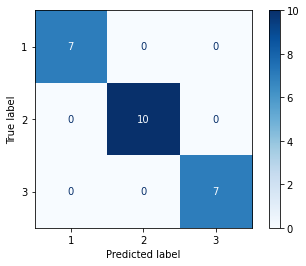

In [96]:
#plot confusion matrix
plot_confusion_matrix(SVM21,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [97]:
#modelling with multinomial logistic regression
np.random.seed(10)
random.seed(10)
lr2 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr2.fit(X_train_vect2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
#accuracy on testing data
predictedlr2 = lr2.predict(X_test_vect2)
accuracy_score(y_test2, predictedlr2)

1.0

In [99]:
#accuracy on training data
accuracy_score(y_train2, lr2.predict(X_train_vect2))

1.0

In [100]:
#classification report
print(classification_report(y_test2, predictedlr2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [101]:
#confusion matrix
print(confusion_matrix(y_test2, predictedlr2))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


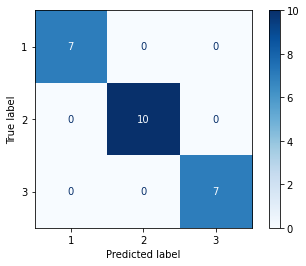

In [102]:
#plot confusion matrix
plot_confusion_matrix(lr2,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [103]:
#modelling with naive bayes
np.random.seed(10)
random.seed(10)
nb2 = naive_bayes.MultinomialNB()
nb2.fit(X_train_vect2, y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [104]:
#accuracy on testing data
predictednb2 = nb2.predict(X_test_vect2)
accuracy_score(y_test2, predictednb2)

1.0

In [108]:
#accuracy on training data
accuracy_score(y_train2, nb2.predict(X_train_vect2))

1.0

In [109]:
#classification report
print(classification_report(y_test2, predictednb2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [110]:
#confusion matrix
print(confusion_matrix(y_test2, predictednb2))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


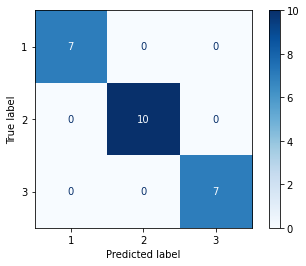

In [111]:
#plot confusion matrix
plot_confusion_matrix(nb2,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [112]:
#modelling with random forest
np.random.seed(10)
random.seed(10)
rf2 = RandomForestClassifier(random_state=0)
rf2.fit(X_train_vect2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [113]:
#accuracy on testing data
predictedrf2 = rf2.predict(X_test_vect2)
accuracy_score(y_test2, predictedrf2)

0.9583333333333334

In [114]:
#accuracy on training data
accuracy_score(y_train2, rf2.predict(X_train_vect2))

1.0

In [115]:
#classification report
print(classification_report(y_test2, predictedrf2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [116]:
#confusion matrix
print(confusion_matrix(y_test2, predictedrf2))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


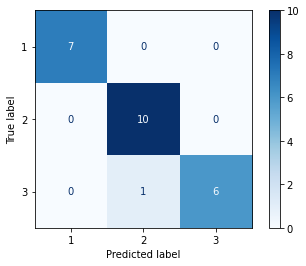

In [117]:
#plot confusion matrix
plot_confusion_matrix(rf2,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

**TF-IDF**

In [118]:
#create TF-IDF vectorizer
tf1 = TfidfVectorizer(lowercase = True, stop_words = stop_words,token_pattern="[A-Za-z]+")

In [119]:
#transform predictor into count vectorizer
X_train_vect12=tf1.fit_transform(X_train2)
X_train_vect12.toarray()
X_test_vect12=tf1.transform(X_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [120]:
#view predictor
tf_df2=pd.DataFrame(X_train_vect2.toarray(), columns=tf1.get_feature_names())
tf_df2

,acara,aceh,acu,adat,adaxc,adelle,adellejewellery,adellexe,adie,adies,adik,adjusmentxe,administrasi,adupi,agama,agen,agenagen,agenda,agraria,agustus,ahli,airlangga,airxe,ajang,ajar,aju,akhirakhir,akomodasi,akrab,akses,aksesoris,aksi,aktivis,akun,akurasi,alam,alamasri,alamat,alami,alas,...,white,whiteningxe,widodo,wilayah,wilson,windows,winwin,wireless,wisata,wiyanto,work,world,wsidodo,wujud,wwwplncoid,wwwrelxnowcoid,x,xa,xc,xe,yahng,yaknixc,yamaha,yangxc,yanuar,yard,yasonna,yasonnaxc,yoghurt,yogjakarta,youngadult,youtu,yovanda,yuan,zainudin,zakat,zaman,zodiak,zona,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,3,2,7,0,0,0,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [121]:
#modelling with svm kernel linear
np.random.seed(10)
random.seed(10)
SVM112 = svm.SVC(C=1.0,kernel='linear', degree=3, gamma='auto')
SVM112.fit(X_train_vect12, y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [122]:
#accuracy on testing data
predicted112 = SVM112.predict(X_test_vect12)
accuracy_score(y_test2, predicted112)

1.0

In [126]:
#accuracy on training data
accuracy_score(y_train2, SVM112.predict(X_train_vect12))

1.0

In [127]:
#classification report
print(classification_report(y_test2, predicted112))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [128]:
#confusion matrix
print(confusion_matrix(y_test2, predicted112))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


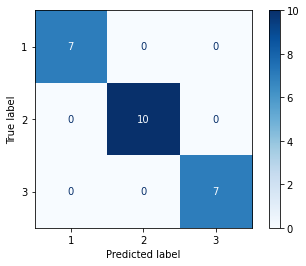

In [129]:
#plot confusion matrix
plot_confusion_matrix(SVM112,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()  

In [130]:
#modelling with multinomial logistic regression
np.random.seed(10)
random.seed(10)
lr12 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr12.fit(X_train_vect12, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
#accuracy on testing data
predictedlr12 = lr12.predict(X_test_vect12)
accuracy_score(y_test2, predictedlr12)

1.0

In [132]:
#accuracy on training data
accuracy_score(y_train2, lr12.predict(X_train_vect12))

1.0

In [133]:
#classification report
print(classification_report(y_test2, predictedlr12))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [134]:
#confusion matrix
print(confusion_matrix(y_test2, predictedlr12))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


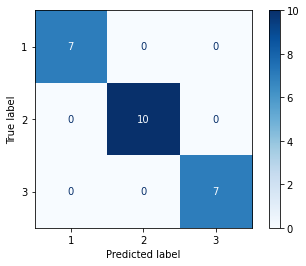

In [135]:
#plot confusion matrix
plot_confusion_matrix(lr12,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()    

In [136]:
#modelling with naive bayes
np.random.seed(10)
random.seed(10)
nb12 = naive_bayes.MultinomialNB()
nb12.fit(X_train_vect12, y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [137]:
#accuracy on testing data
predictednb12 = nb12.predict(X_test_vect12)
accuracy_score(y_test2, predictednb12)

1.0

In [138]:
#accuracy on training data
accuracy_score(y_train2, nb12.predict(X_train_vect12))

1.0

In [139]:
#classification report
print(classification_report(y_test2, predictednb12))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [140]:
#confusion matrix
print(confusion_matrix(y_test2, predictednb12))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  0  7]]


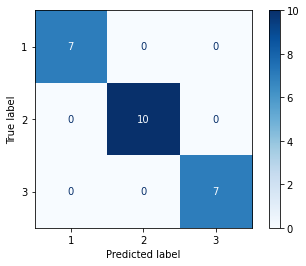

In [141]:
#plot confusion matrix
plot_confusion_matrix(nb12,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()    

In [142]:
#modelling with random forest
np.random.seed(10)
random.seed(10)
rf12 = RandomForestClassifier(random_state=0)
rf12.fit(X_train_vect12, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [143]:
#accuracy on testing data
predictedrf12 = rf12.predict(X_test_vect12)
accuracy_score(y_test2, predictedrf12)

0.9583333333333334

In [144]:
#accuracy on training data
accuracy_score(y_train2, rf12.predict(X_train_vect12))

1.0

In [146]:
#classification report
print(classification_report(y_test2, predictedrf12))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.91      1.00      0.95        10
           3       1.00      0.86      0.92         7

    accuracy                           0.96        24
   macro avg       0.97      0.95      0.96        24
weighted avg       0.96      0.96      0.96        24



In [148]:
#confusion matrix
print(confusion_matrix(y_test2, predictedrf12))

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1  6]]


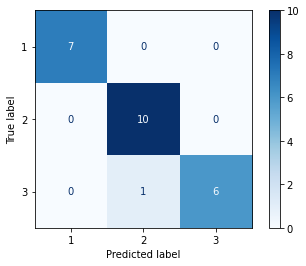

In [149]:
#plot confusion matrix
plot_confusion_matrix(rf12,X_test_vect2, y_test2,cmap=plt.cm.Blues)  
plt.show()